### Step 1: Understand the Problem and the Data
- Objective: Predict diabetes class (0 = Non-diabetic, 1 = Pre-diabetic, 2 = Diabetic).
- Dataset: Contains health-related features (Age, BMI, Glucose, Insulin, Gender, etc.).
- Target Variable: `Diabetes_Outcome` (0, 1, 2).

In [39]:
import numpy as np
import pandas as pd

In [40]:
# Loading dataset
df = pd.read_csv('Multiclass Diabetes Dataset.csv')

In [41]:
df.shape

(264, 12)

In [42]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


### Step 2: Inspect the Data
- Look at data shape, column names, and datatypes.
- Check for duplicates and general statistics.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [44]:
df.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

In [45]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [46]:
df['Class'].value_counts()

Class
2    128
0     96
1     40
Name: count, dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

### Step 3: Handling Missing Values
- Check if dataset has missing values.

In [48]:
# Check missing values
df.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

### Step 4: Visualize Data Relationships
- Plot histograms for numeric features.
- Correlation heatmap.
- Boxplots to check distributions.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

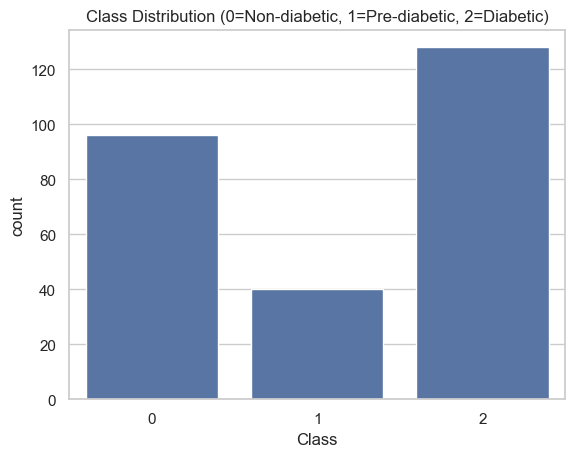

In [50]:
# Class distribution
sns.countplot(x="Class", data=df) ## shows how many sample the dataset have (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)
plt.title("Class Distribution (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)")
plt.show()

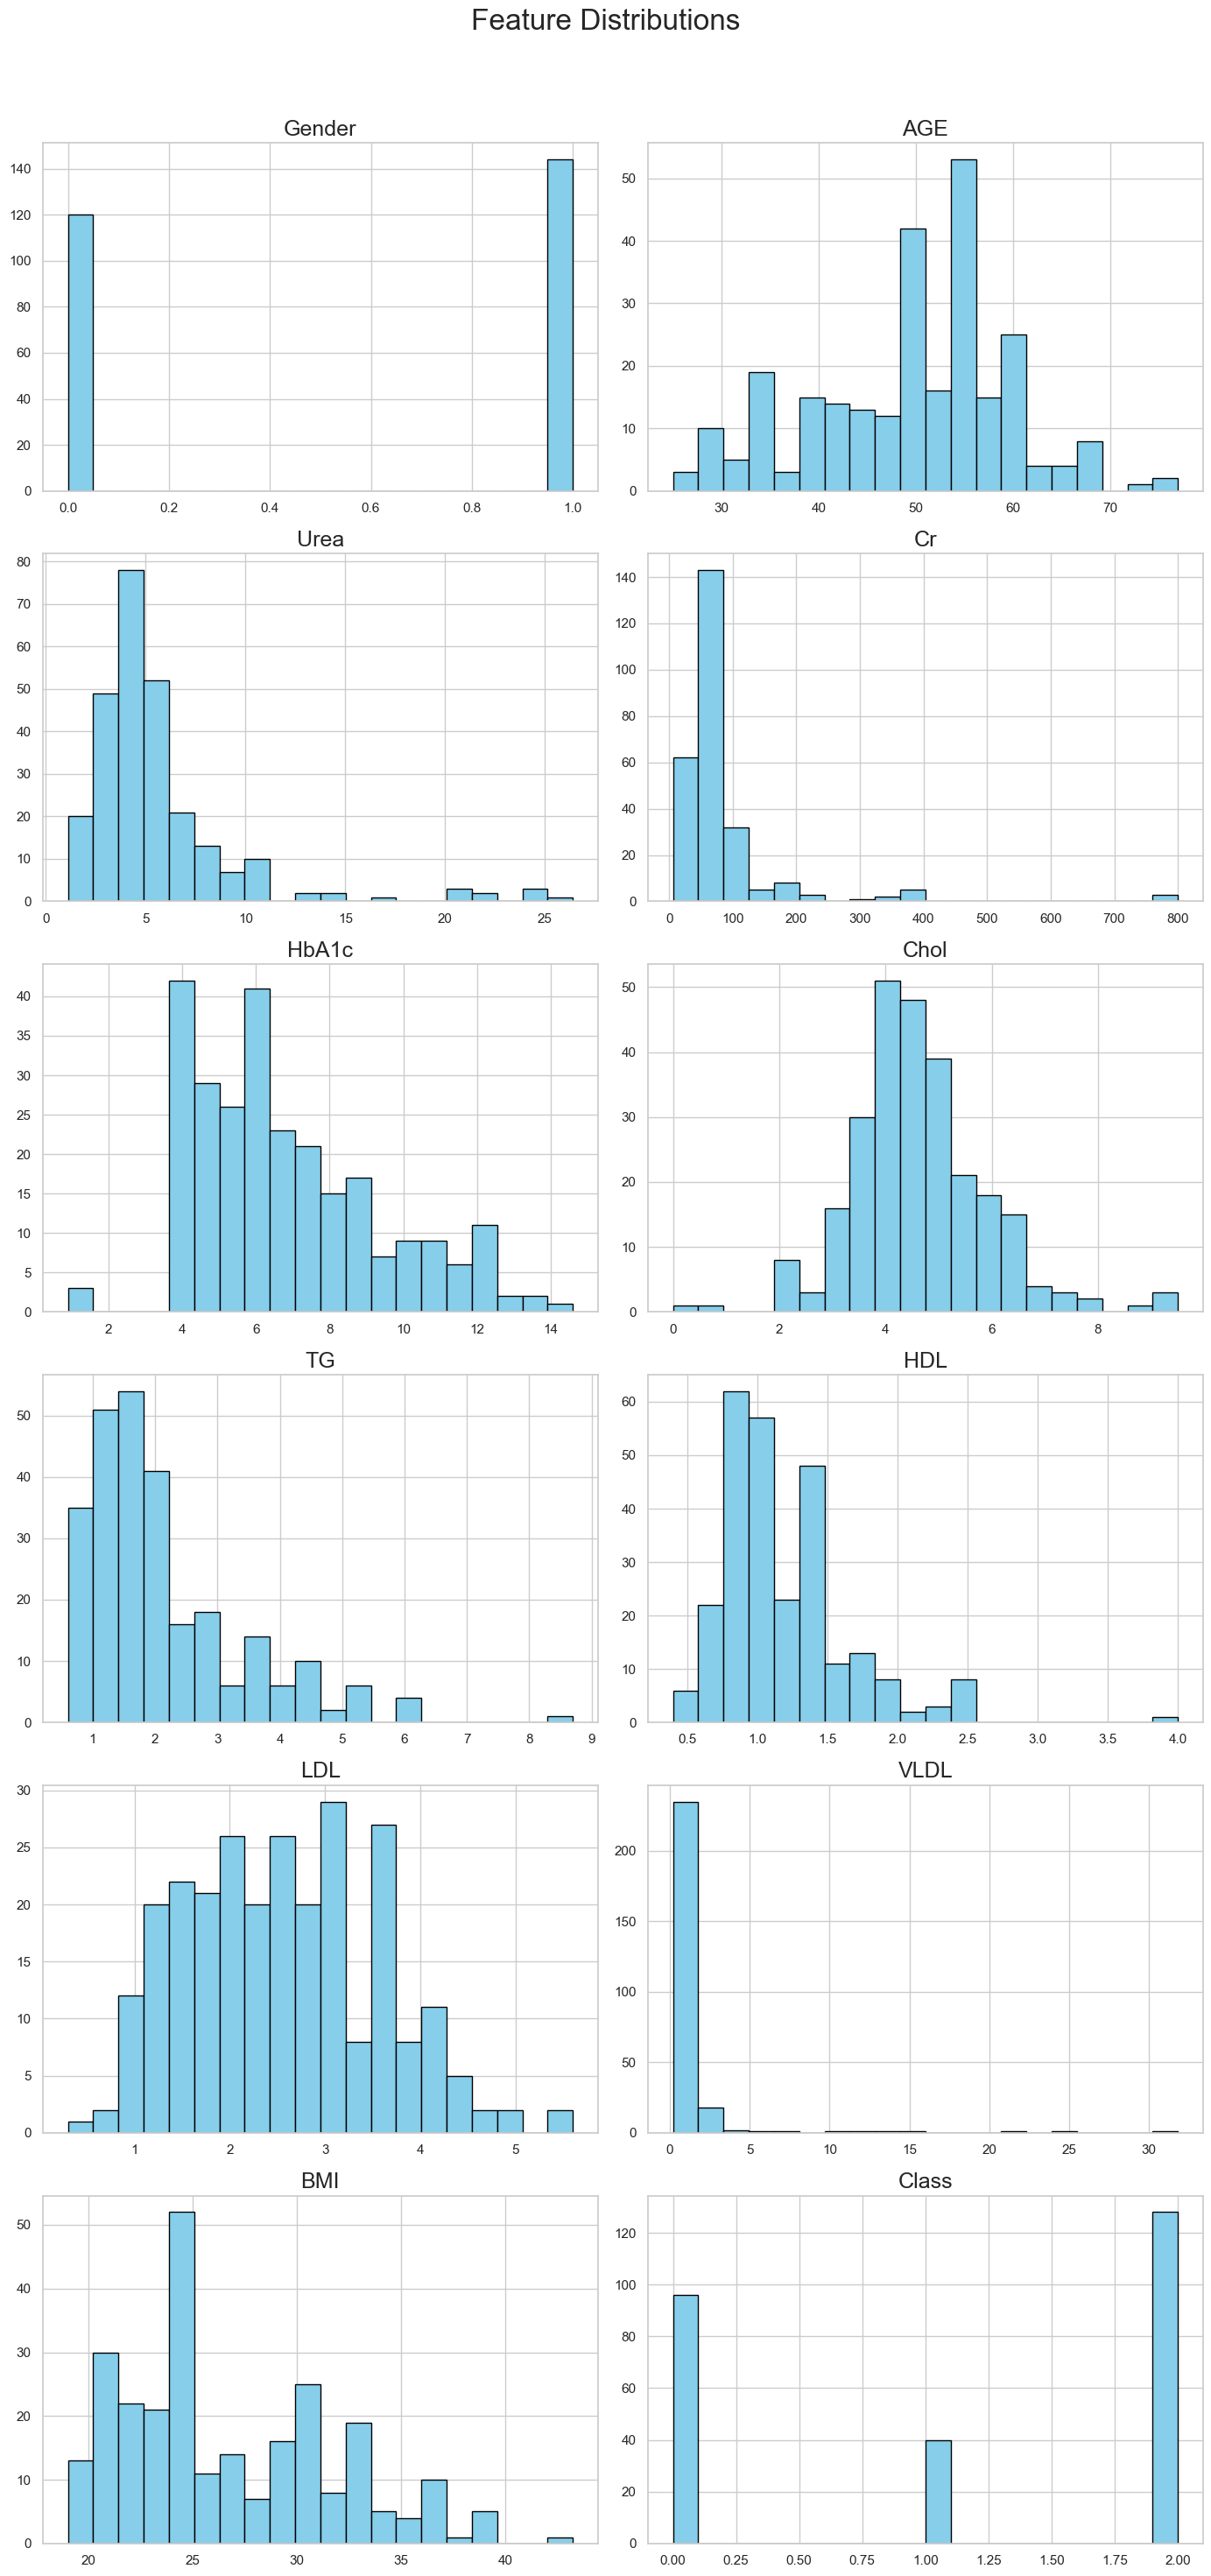

In [51]:
import matplotlib.pyplot as plt

# Numeric columns
num_features = df.select_dtypes(include='number').columns.tolist()

# 2 plots per row
num_cols = 2
num_rows = (len(num_features) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows*5))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_features):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=18 )

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distributions", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

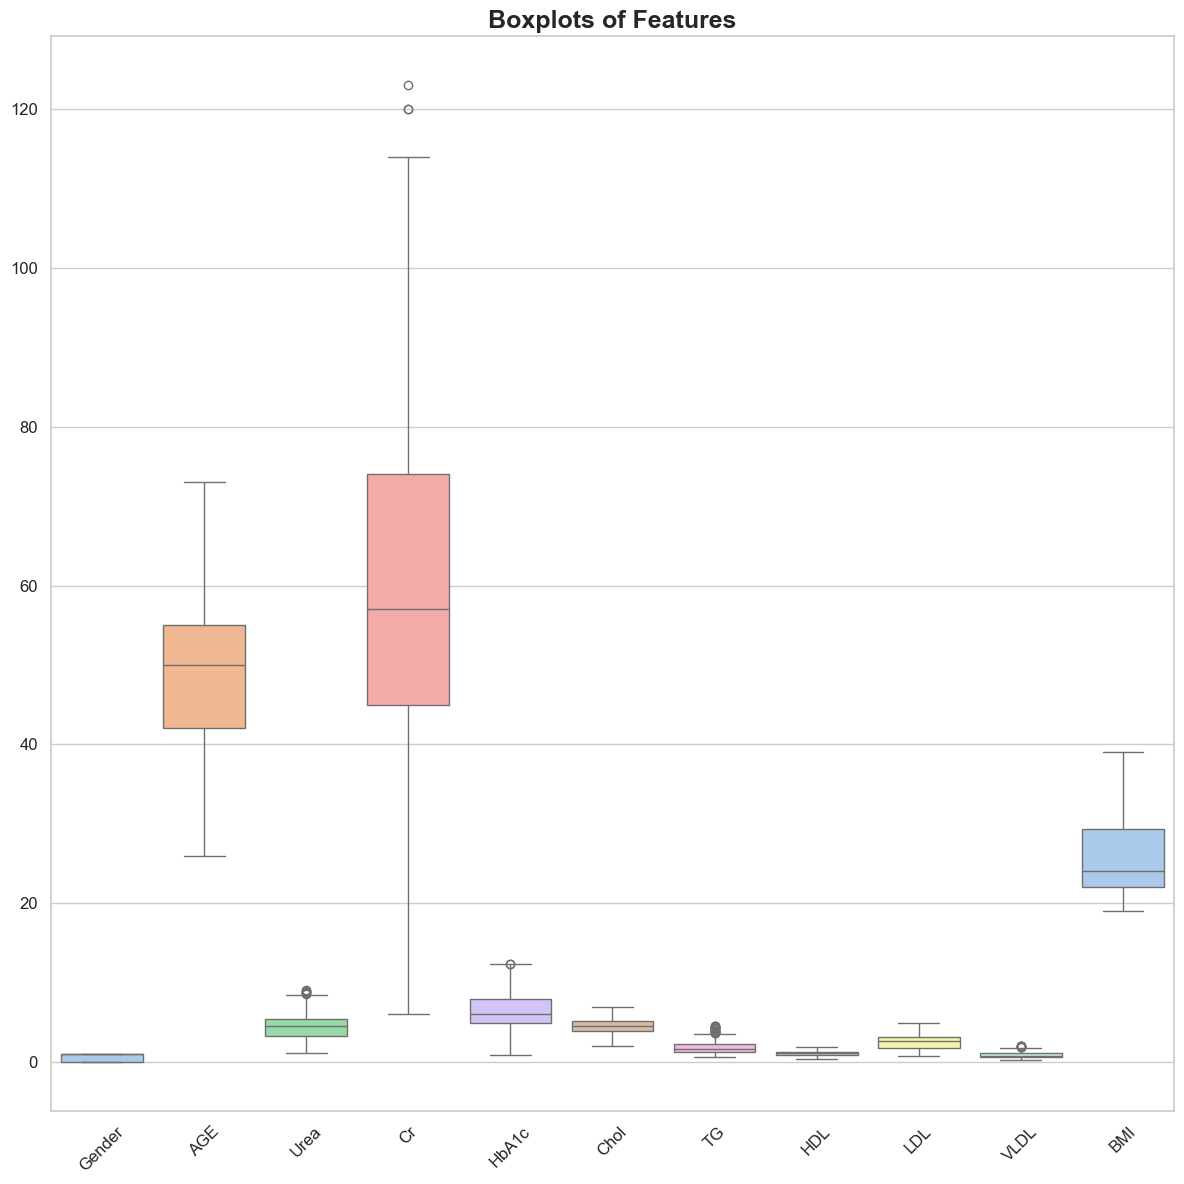

In [58]:
sns.set(style="whitegrid")

# Plot boxplots
plt.figure(figsize=(12,12))
sns.boxplot(data=df.drop(columns=["Class"]), palette="pastel")
plt.title("Boxplots of Features", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)  # rotate feature names for readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Step 7: Handling Outliers
- Detect using IQR method.
- Optionally remove or cap outliers.

In [59]:
# Correct: get numeric columns first
num_features = df.select_dtypes(include='number').columns.tolist()  # list of numeric column names

# Outlier detection with IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

# Count outliers per column
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 Gender     0
AGE        0
Urea       6
Cr         3
HbA1c      2
Chol       0
TG        18
HDL        0
LDL        0
VLDL       7
BMI        0
Class      0
dtype: int64


In [60]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[num_features] < (Q1 - 1.5 * IQR)) | 
                (df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original shape: (191, 12)
After removing outliers: (164, 12)


In [61]:
df = df_clean  # overwrite the original df

In [62]:
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.00,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.00,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.00,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.00,0
5,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,65,5.0,97,7.0,3.4,1.6,0.7,2.0,0.7,26.00,2
223,1,73,6.1,83,12.0,5.0,3.3,1.3,2.4,1.5,33.00,2
225,0,55,5.7,88,7.2,6.5,3.4,0.9,2.6,1.2,33.00,2
227,1,67,7.8,99,7.1,2.7,1.0,0.8,1.4,0.5,29.63,2
